In [87]:
import pandas as pd

In [88]:
df = pd.read_csv("..//..//Datasets//diabetes.csv")

In [89]:
df

,preg,glucose,bp_diastolic,skin_triceps,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

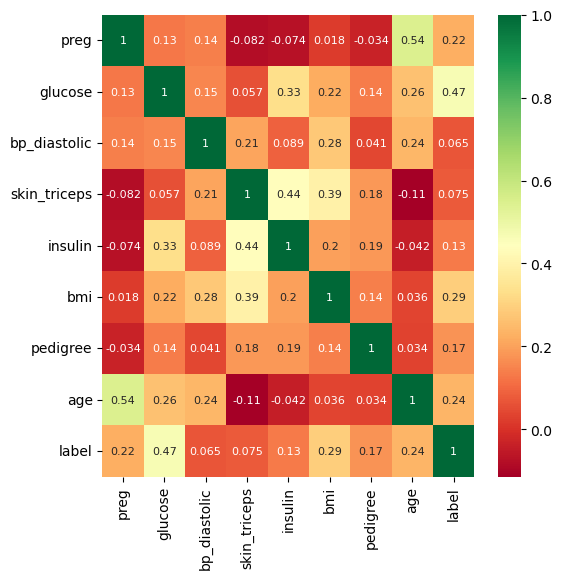

In [91]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(6,6))
#plot heat map
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn", annot_kws={"fontsize" : 8})

In [92]:
feature_cols = ['preg', 'glucose', 'insulin', 'bmi', 'pedigree', 'age']
print(feature_cols)

['preg', 'glucose', 'insulin', 'bmi', 'pedigree', 'age']


In [93]:
df.columns

Index(['preg', 'glucose', 'bp_diastolic', 'skin_triceps', 'insulin', 'bmi',
       'pedigree', 'age', 'label'],
      dtype='object')

In [94]:
feature_cols = df.columns.drop(['bp_diastolic', 'skin_triceps', 'label'])
print(feature_cols)

Index(['preg', 'glucose', 'insulin', 'bmi', 'pedigree', 'age'], dtype='object')


In [95]:
from sklearn.model_selection import train_test_split

In [96]:
#dataframe (Splitting data into features X, and label)
X = df[feature_cols] #Features
#series
y = df.label #target variable (We will have to write df['label'] if the column name has space, since we dont have space so we used df.label
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 30) #splitting rows

In [97]:
len(y_train)

537

In [98]:
from sklearn.tree import DecisionTreeClassifier
#create decision Tree classifier object
clf = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [99]:
len(y_test)

231

In [100]:
X_train.to_csv("../../Datasets/X_train1.csv")

In [101]:
def applyRegAlgo(algo, dpth = 3, rdms =10):
    if algo =='DTreeR':
        from sklearn.tree import DecisionTreeRegressor
        rgrsr = DecisionTreeRegressor(random_state=rdms, max_depth = dpth)
    elif algo == 'KNNR':
        from sklearn import neighbors
        rgrsr = neighbors.KNeighborsRegressor(n_neighbors = dpth)
    elif algo == "RFR":
        from sklearn.ensemble import RandomForestRegressor
        rgrsr = RandomForestRegressor(n_estimators = dpth, random_state = rdms)
    elif algo == "LR":
        from sklearn.linear_model import LinearRegression
        rgrsr = LinearRegression()
    return rgrsr

In [102]:
rgsr = applyRegAlgo("DTreeR")

In [103]:
#train classifier
model = clf.fit(X_train, y_train)

In [104]:
#predict the response for test dataset
y_pred = model.predict(X_test)

In [105]:
rgsr = applyRegAlgo("KNNR")

In [106]:
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [107]:
rgsr = applyRegAlgo("RFR")

In [108]:
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [109]:
rgsr = applyRegAlgo("LR")

In [110]:
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [111]:
len(y_pred)

231

In [112]:
len(y_test)

231

In [113]:
from sklearn import metrics

In [114]:
def EvIndicator(ytst, yprd):
    mae = metrics.mean_absolute_error(ytst, yprd)
    mse = metrics.mean_squared_error(ytst, yprd)
    rmse = metrics.mean_squared_error(ytst, yprd)**(0.5)
    rs = metrics.r2_score(ytst, yprd)
    return mae, mse, rmse, rs

In [115]:
MAE, MSE, RMSE, RS = EvIndicator(y_test, y_pred)

In [116]:
print('Evaluation indicators')
print(clf)
print("MAE: \t", MAE)
print("MSE: \t", MSE)
print("RMSE: \t", RMSE)
print("R-Squared:", RS)
print('#######################')

Evaluation indicators
DecisionTreeClassifier(criterion='entropy', max_depth=4)
MAE: 	 0.24675324675324675
MSE: 	 0.24675324675324675
RMSE: 	 0.496742636335202
R-Squared: -0.1501572327044025
#######################


In [117]:
rgsr = applyRegAlgo("KNNR")

In [118]:
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [119]:
from sklearn import metrics

In [120]:
MAE, MSE, RMSE, RS = EvIndicator(y_test, y_pred)

In [121]:
print('Evaluation indicators')
print(clf)
print("MAE: \t", MAE)
print("MSE: \t", MSE)
print("RMSE: \t", RMSE)
print("R-Squared:", RS)
print('#######################')

Evaluation indicators
DecisionTreeClassifier(criterion='entropy', max_depth=4)
MAE: 	 0.24675324675324675
MSE: 	 0.24675324675324675
RMSE: 	 0.496742636335202
R-Squared: -0.1501572327044025
#######################


In [122]:
y = pd.DataFrame({'Original':y_test, 'Predicted': y_pred})
y.head()

,Original,Predicted
226,0,0
610,0,0
505,0,0
470,0,0
474,0,0


In [123]:
y.tail()

,Original,Predicted
499,0,0
582,0,1
273,0,0
330,0,0
522,0,0


In [124]:
y.sample(10)

,Original,Predicted
98,0,0
575,0,0
285,0,0
563,0,0
610,0,0
707,0,0
195,1,1
257,0,0
702,1,1
80,0,0


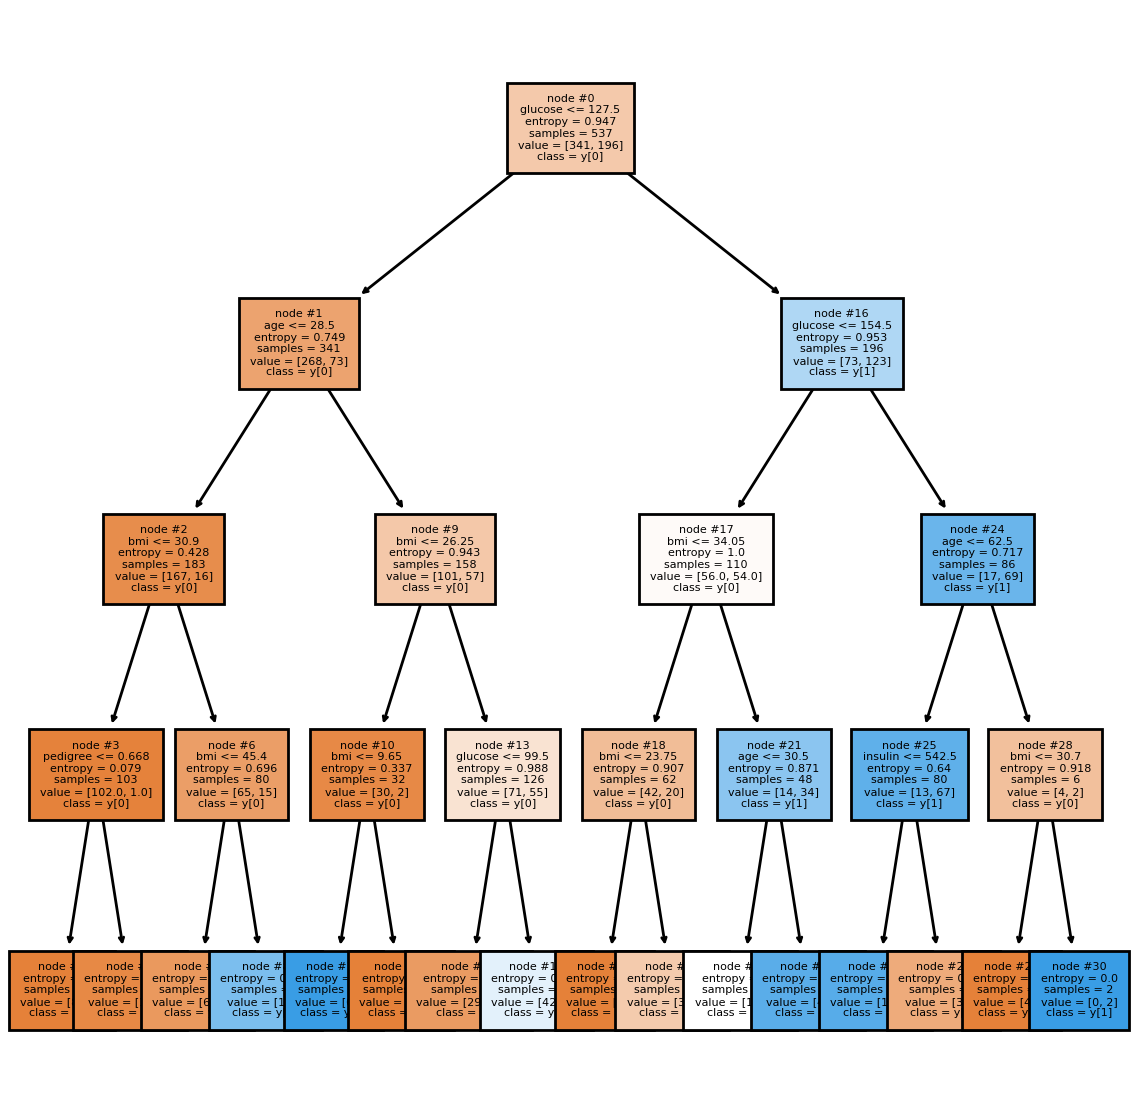

In [125]:
from sklearn import tree
#plot the decision tree with customizations
plt.figure(figsize=(7, 7), dpi=200)
plt.title("Decision Tree Visualization")
tree.plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=True, fontsize=4,max_depth=4, node_ids=True);

plt.show()

In [126]:
#calculate accuracy

In [127]:
from sklearn import metrics

In [128]:
result = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)

Confusion Matrix:
[[130  29]
 [ 28  44]]


In [129]:
def plt1():
    import seaborn as sns; sns.set()
    plt.figure(figsize=(4,4))
    c_mtrx = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(c_mtrx, annot=True, fmt = '.3g')

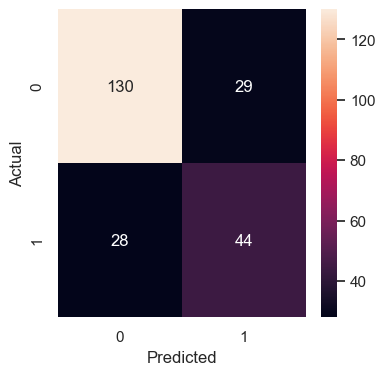

In [130]:
plt1()

In [131]:
#[row, column]
#(Actual, Predict)
TN = result[0,0]; FP = result[0,1]
FN = result[1,0]; TP= result[1,1]

print("TN: ", TN, "\tFP: ", FP)
print("FN: ", FN, "\tTP: ", TP)

TN:  130 	FP:  29
FN:  28 	TP:  44


In [132]:
print('Metrics computed from a confusion matrix')
print("Accuracy:\t", metrics.accuracy_score(y_test, y_pred))
print("Sensitivity:\t", metrics.recall_score(y_test, y_pred))
print("Specificity:\t",TN / (TN + FP))
print("Precision:\t", metrics.precision_score(y_test, y_pred))
print("Classification Eerror:", 1 - metrics.accuracy_score(y_test, y_pred))
print("False_Positive_Rate:", 1 - TN / (TN + FP))

Metrics computed from a confusion matrix
Accuracy:	 0.7532467532467533
Sensitivity:	 0.6111111111111112
Specificity:	 0.8176100628930818
Precision:	 0.6027397260273972
Classification Eerror: 0.24675324675324672
False_Positive_Rate: 0.1823899371069182


In [133]:
#get total number of 0 in the actual data set
count0 = df['label'][df.label==0].count()
#get total number of 1 in the actual data set
count1 = df['label'][df.label==1].count()
print("Actual Dataset")
print("0's:", count0)
print("1's:", count1)

Actual Dataset
0's: 500
1's: 268


In [134]:
#get total number of 0 in the training data set
Trcount0 = y_train[y_train==0].count()
#get total number of 1 in the training data set
Trcount1 = y_train[y_train==1].count()

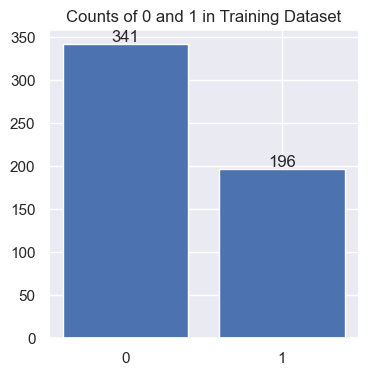

In [135]:
#plotting the bar chart
labels = ['0', '1']
counts = [Trcount0, Trcount1]
plt.figure(figsize=(4,4))
plt.title('Counts of 0 and 1 in Training Dataset')
plt.bar(labels, counts)
#add annotations to the bars
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

In [136]:
df

,preg,glucose,bp_diastolic,skin_triceps,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [137]:
df.shape

(768, 9)